In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns

sns.set_context("paper", font_scale=1.5)

In [73]:
df = pd.read_pickle("../data/interim/model_preds/MSN_preds_full.pkl.xz")

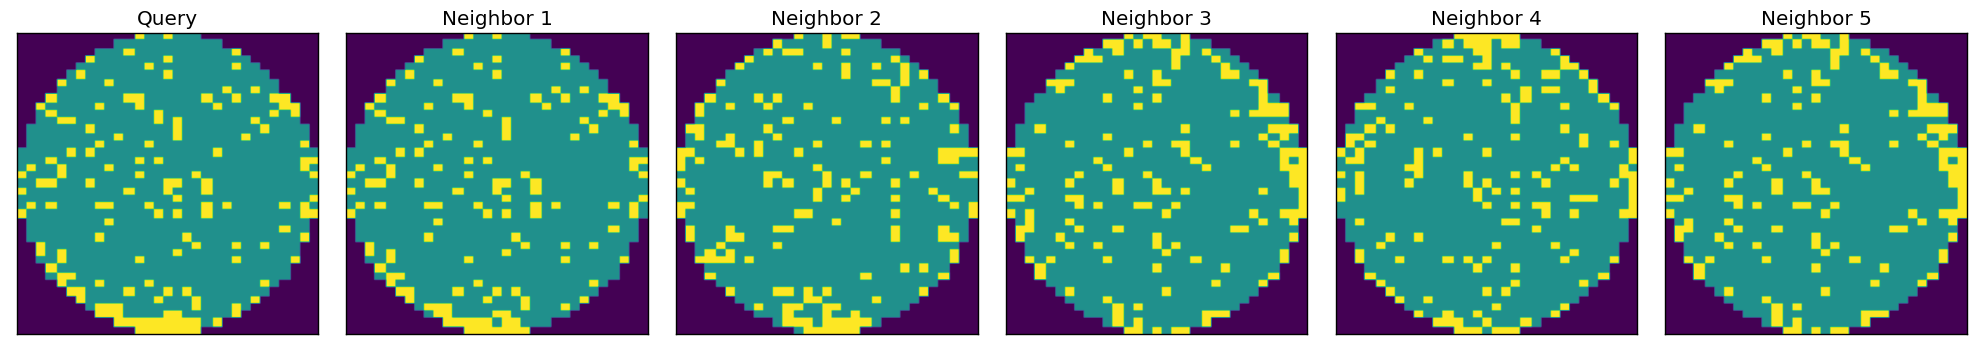

In [117]:
# Create a nearest neighbors model from the data
data_cols = df.columns.difference(["waferMap", "failureType", "failureCode"])
data = df[data_cols]

# Select a random point in the data with a "Scratch" failureType
random_index = df.query("failureType == 'Edge-Loc'").sample(1).index[0]
# random_index = np.random.randint(0, len(data))
random_point = data.iloc[random_index].values

# Find the nearest neighbors to the random point
top_5 = np.argsort(np.linalg.norm(data.values - random_point, axis=1))[:6]
wafers = df.iloc[top_5].waferMap.apply(lambda x: Image.fromarray(x).resize((128, 128), Image.Resampling.NEAREST)).values

fig, axs = plt.subplots(1, 6, figsize=(20, 20))
axs[0].imshow(wafers[0], cmap="viridis")
axs[0].set_title(f"Query")
for i, wafer in enumerate(wafers[1:]):
    axs[i + 1].imshow(wafer, cmap="viridis")
    axs[i + 1].set_title(f"Neighbor {i + 1}")

# Disable axis labels and ticks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()